# Complex ON Model

In [1]:
import numpy as np
import pandas as pd

from pystatplottools.pdf_env.loading_figure_mode import loading_figure_mode
fma, plt = loading_figure_mode(develop=True) # develop=False will export the generated figures as pngs into "./data/RectangleData"
plt.style.use('seaborn-dark-palette')

if 'root_dir' not in locals():
    # Navigate to simulations/ComplexONModel directory as simulation root directory
    import os
    os.chdir("../simulations/ComplexONModel")
    root_dir = os.getcwd()

# To be able to compute custom measures
import sys
sys.path.append("./../../python_scripts")
    
mcmc_model_dir = "ComplexONModelComplexLangevin/"
mcmc_data_dir = root_dir + "/data/" + mcmc_model_dir
mcmc_results_dir = root_dir + "/results/" + mcmc_model_dir

data_dir = root_dir + "/data/" + mcmc_model_dir
results_dir = root_dir + "/results/" + mcmc_model_dir

## MCMC Results

### Expectation Values

In [2]:
from mcmctools.modes.expectation_value import load_expectation_value_results
expectation_values = load_expectation_value_results(files_dir="ComplexONModelComplexLangevin")
# Insert KappaImag as column (as floating number)
expectation_values.insert(0, "KappaImag", expectation_values.index.values.astype(np.float))
expectation_values.insert(1, "SecondMoment", np.real(np.sum(np.power(expectation_values["ExpVal"].values, 2.0), axis=1)))
expectation_values = expectation_values.sort_values("KappaImag")
expectation_values

Quantity   KappaImag SecondMoment              ExpVal               Error  \
Observable                                     Energy              Energy   
Element                                                                     
kappa_imag                                                                  
-0.400000       -0.4    -7.848480 -2.674733+4.009873j  0.001407+0.000621j   
-0.300000       -0.3     1.039942 -3.019566+2.996872j  0.001072+0.000424j   
-0.200000       -0.2     6.728222 -3.103311+2.012810j  0.000838+0.000283j   
-0.100000       -0.1    10.437077 -3.219472+1.006100j  0.000960+0.000098j   
0.000000         0.0    12.083937 -3.263255+0.000000j  0.001435+0.000000j   
0.100000         0.1    10.466979 -3.198580-1.017093j  0.001109+0.000107j   
0.200000         0.2     7.424951 -3.145220-2.014755j  0.001068+0.000253j   
0.300000         0.3     0.951757 -2.918798-3.015098j  0.001238+0.000402j   
0.400000         0.4    -8.236957 -2.634491-4.074915j  0.001332+0.000797j   

Quantity                ExpVal                                          \
Observable                Mean                                           
Element                      0                   1                   2   
kappa_imag                                                               
-0.400000   0.493966-0.347693j  0.822715-0.151155j -0.335648+0.014755j   
-0.300000   0.500282-0.198234j -0.163711+0.036640j -0.704649+0.133677j   
-0.200000   0.045923-0.013299j  0.152571-0.033102j -0.940172+0.175677j   
-0.100000   0.026974+0.017526j  0.604584-0.075917j -0.563136+0.077038j   
0.000000    0.816631+0.000000j -0.273955+0.000000j  0.729076+0.000000j   
0.100000    0.234177-0.078363j -0.907605-0.155206j -0.508450+0.023095j   
0.200000    0.887744+0.197525j  0.314780-0.102274j -0.198088-0.144885j   
0.300000    0.452237+0.111956j -0.716236-0.125951j -0.194107-0.049602j   
0.400000    0.538028+0.191622j -1.095241-0.329029j  0.038546-0.375199j   

Quantity                                     Error                      \
Observable                                    Mean                       
Element                      3                   0                   1   
kappa_imag                                                               
-0.400000   0.476579-0.200722j  0.001701+0.000301j  0.001888+0.000590j   
-0.300000   0.434943-0.029570j  0.002386+0.000511j  0.001520+0.000173j   
-0.200000  -0.522470+0.032620j  0.001060+0.000060j  0.001150+0.000172j   
-0.100000   0.643125-0.025751j  0.001361+0.000101j  0.001532+0.000107j   
0.000000    0.402017+0.000000j  0.001153+0.000000j  0.001212+0.000000j   
0.100000   -0.405233+0.003843j  0.001087+0.000153j  0.001225+0.000159j   
0.200000   -0.861031-0.074446j  0.000951+0.000218j  0.001431+0.000201j   
0.300000    0.916726+0.203782j  0.001360+0.000190j  0.001061+0.000118j   
0.400000   -0.473030-0.033010j  0.000926+0.000264j  0.000501+0.000318j   

Quantity                                            
Observable                                          
Element                      2                   3  
kappa_imag                                          
-0.400000   0.001281+0.000164j  0.001516+0.000332j  
-0.300000   0.001696+0.000456j  0.001430+0.000312j  
-0.200000   0.001256+0.000132j  0.002033+0.000264j  
-0.100000   0.001310+0.000182j  0.001976+0.000118j  
0.000000    0.001315+0.000000j  0.001153+0.000000j  
0.100000    0.001411+0.000190j  0.000513+0.000103j  
0.200000    0.000965+0.000112j  0.000906+0.000104j  
0.300000    0.000801+0.000086j  0.000981+0.000096j  
0.400000    0.001653+0.000432j  0.001094+0.000256j

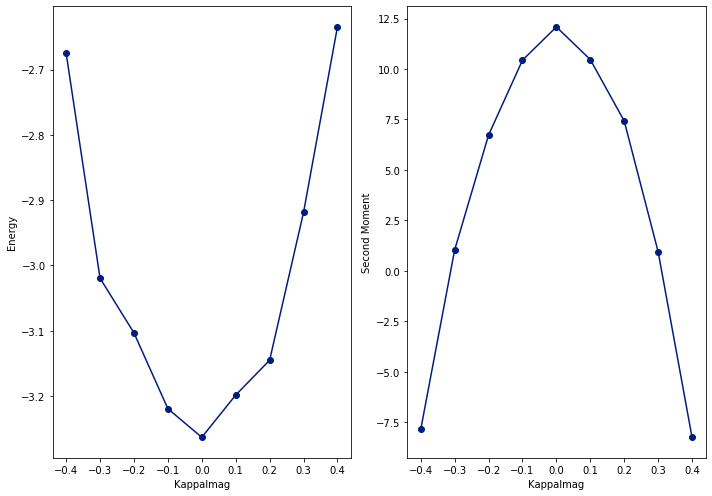

In [3]:
fig, axes = fma.newfig(1.4, ncols=2, figsize=(10, 7))

axes[0].plot(expectation_values["KappaImag"], np.real(expectation_values["ExpVal", "Energy", ""]), "o-")
axes[0].set_xlabel("KappaImag")
axes[0].set_ylabel("Energy")

axes[1].plot(expectation_values["KappaImag"], np.real(expectation_values["SecondMoment", "", ""]), "o-")
axes[1].set_xlabel("KappaImag")
axes[1].set_ylabel("Second Moment")

plt.tight_layout()

fma.savefig(results_dir, "average_plaquette")

## Configurations as Pytorch Dataset

We show how the mcmc configurations can be stored and loaded as a .pt file.

(See also python_scripts/loading_configurations.py and python_scripts/pytorch_data_generation.py)

### Preparation

In [4]:
data_generator_args = {
    # ConfigDataGenerator Args
    "data_type": "target_param",
    # Args for ConfigurationLoader
    "path": mcmc_data_dir,
    "total_number_of_data_per_file": 500,
    "identifier": "expectation_value",
    "running_parameter": "kappa_imag"
    # "chunksize": 100  # If no chunksize is given, all data is loaded at once
}

# Prepare in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import prepare_in_memory_dataset
from mcmctools.pytorch.data_generation.datagenerationroutines import data_generator_factory

prepare_in_memory_dataset(
    root=data_dir,
    batch_size=89,
    data_generator_args=data_generator_args,
    data_generator_name="BatchConfigDataGenerator",
    data_generator_factory=data_generator_factory
)

Random seed is set by np.random.seed()


### Generating and Loading the Dataset

In [5]:
# Load in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import load_in_memory_dataset

# The dataset is generated and stored as a .pt file in the data_dir/data directory the first time this function is called. Otherwise the .pt is loaded.
data_loader = load_in_memory_dataset(
    root=data_dir, batch_size=16, data_generator_factory=data_generator_factory, slices=None, shuffle=True,
    num_workers=0, rebuild=False
    # sample_data_generator_name="ConfigDataGenerator"  # optional: for a generation of new samples
)

# Load training data
for batch_idx, batch in enumerate(data_loader):
    data, target = batch
    # print(batch_idx, len(data))

RDKit WARNING: [13:46:02] Enabling RDKit 2019.09.1b1 jupyter extensions


### Inspection of the Dataset - Sample Visualization

In [6]:
from pystatplottools.visualization import sample_visualization

# Random samples
config, label = data_loader.dataset.get_random_sample()
batch, batch_label = data_loader.dataset.get_random_batch(108)

In [7]:
data[:, 1::2].min(), data[:, 1::2].max(), data[:, 0::2].min(), data[:, 0::2].max()

(tensor(-1.0027), tensor(0.9207), tensor(-1.7593), tensor(1.6374))

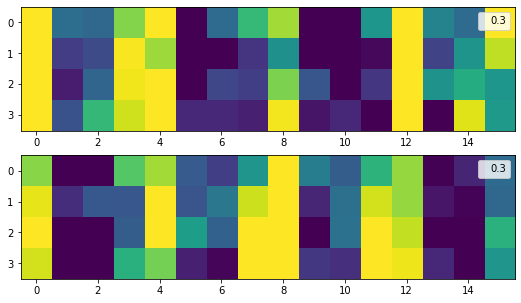

In [8]:
# Single Sample
fig, axes = fma.newfig(1, nrows=2, ratio=0.5, figsize=(10, 5))

# Real parts
sample_visualization.fd_im_single_sample(sample=config[0::2], label=label, config_dim=(4, 16), num_std=1,
                                         fig=fig, ax=axes[0]);
# Imag parts
sample_visualization.fd_im_single_sample(sample=config[1::2], label=label, config_dim=(4, 16), num_std=1,
                                         fig=fig, ax=axes[1]);
fma.savefig(results_dir, "single_sample")

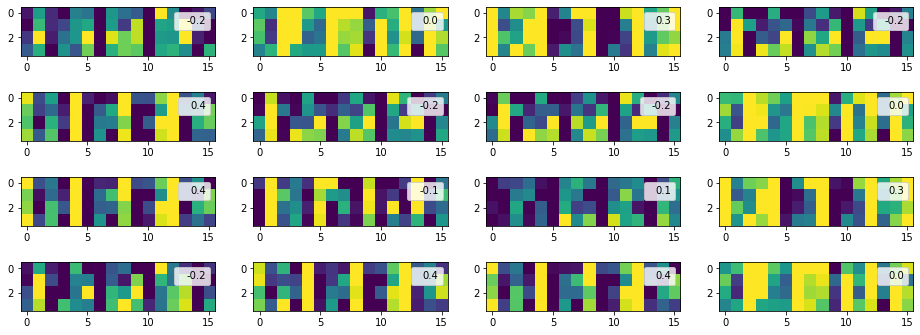

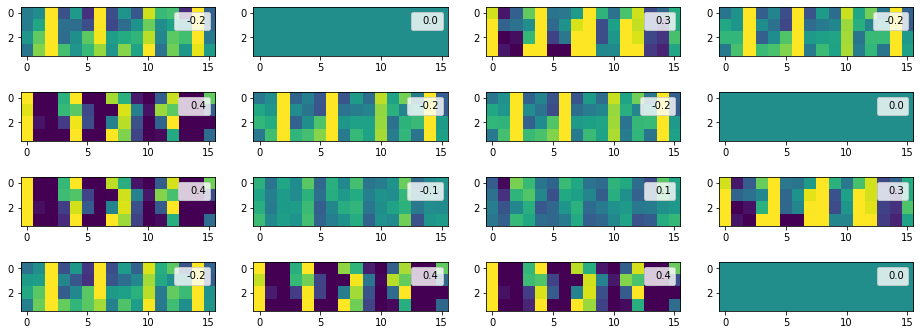

In [9]:
# Batch with labels
sample_visualization.fd_im_batch(batch[:, 0::2], batch_labels=batch_label, num_samples=16, dim=(4, 4),
                                 config_dim=(4, 16), num_std=1,
                                 fma=fma, filename="batch_real_parts", directory=results_dir, width=2.3, ratio=1.0, figsize=(16, 6));

sample_visualization.fd_im_batch(batch[:, 1::2], batch_labels=batch_label, num_samples=16, dim=(4, 4),
                                 config_dim=(4, 16), num_std=1,
                                 fma=fma, filename="batch_imag_parts", directory=results_dir, width=2.3, ratio=1.0, figsize=(16, 6));

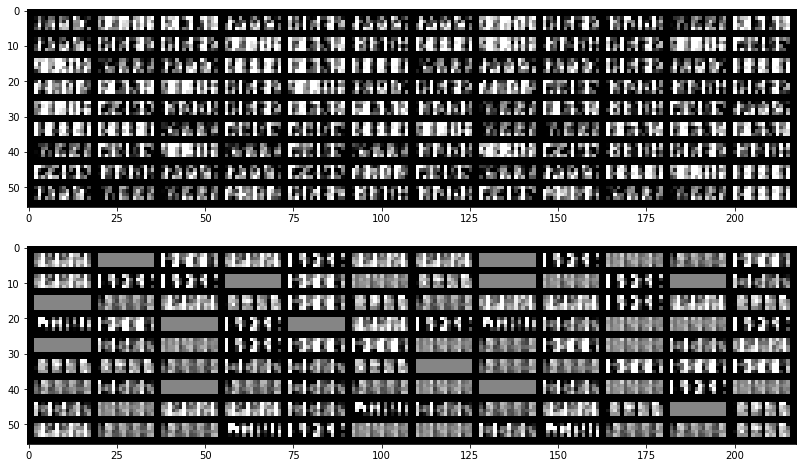

In [10]:
# Batch grid
fig, axes = fma.newfig(1, nrows=2, ratio=0.5, figsize=(16, 8))

# Real parts
sample_visualization.fd_im_batch_grid(batch[:, 0::2], config_dim=(4, 16), num_std=1,
                                      fig=fig, ax=axes[0]);
# Imag parts
sample_visualization.fd_im_batch_grid(batch[:, 1::2], config_dim=(4, 16), num_std=1,
                                      fig=fig, ax=axes[1]);
fma.savefig(results_dir, "batch_grid")